In [1]:
import cv2,os

In [4]:
data_path='E:\dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [5]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
    
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        
        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
            
        except Exception as e:
            print('Exception:',e)

In [6]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [7]:
np.save('data',data)
np.save('target',new_target)

In [8]:
data=np.load('data.npy')
target=np.load('target.npy')

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(100,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(50,activation='relu'))

model.add(Dense(2,activation='softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [12]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 990 samples, validate on 248 samples
Epoch 1/20
990/990 [==============================] - 79s 80ms/step - loss: 0.6998 - accuracy: 0.5626 - val_loss: 0.5739 - val_accuracy: 0.7540
Epoch 2/20
990/990 [==============================] - 57s 58ms/step - loss: 0.4839 - accuracy: 0.7606 - val_loss: 0.4602 - val_accuracy: 0.7500
Epoch 3/20
990/990 [==============================] - 58s 59ms/step - loss: 0.3683 - accuracy: 0.8505 - val_loss: 0.2711 - val_accuracy: 0.8911
Epoch 4/20
990/990 [==============================] - 60s 60ms/step - loss: 0.2390 - accuracy: 0.9000 - val_loss: 0.3908 - val_accuracy: 0.8427
Epoch 5/20
990/990 [==============================] - 62s 63ms/step - loss: 0.1629 - accuracy: 0.9404 - val_loss: 0.2099 - val_accuracy: 0.9234
Epoch 6/20
990/990 [==============================] - 60s 61ms/step - loss: 0.1338 - accuracy: 0.9556 - val_loss: 0.1819 - val_accuracy: 0.9315
Epoch 7/20
990/990 [==============================] - 63s 64ms/step - loss: 0.0867 - accur

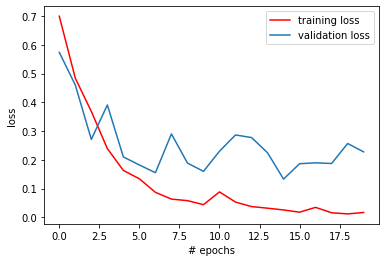

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

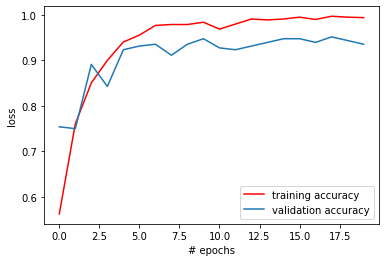

In [14]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 4s 29ms/step
[0.3280482602076254, 0.95652174949646]
